In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("cleaned_final.csv")

In [2]:
pd.set_option('display.max_columns', None)
display(df.head())
df.shape

,PM10,SO2,CO,NO2,NOX,NO,O3,temp,feelslike,humidity,dew,windgust,windspeed,winddir,pressure,visibility,cloudcover,solarradiation,solarenergy,uvindex,hour,day,month,dayofweek,season,wind_dir_rad,wind_dir_sin,wind_dir_cos,weather_group_code,is_rainy,humidity_level,feelslike_diff,is_weekend,is_nighttime,is_rush_hour,humid_heat_index,uv_level
0,47.976,2.622,633.510,91.5125,123.564,44.600,4.0,10.0,10.0,87.38,8.0,16.6,9.4,250.0,1020.0,9.0,50.0,0.0,0.0,0.0,0,2,1,6,1,4.363323,-0.939693,-0.342020,0,0,2,0.0,1,1,0,873.80,0
1,50.498,2.786,537.026,90.1475,121.566,43.642,3.6,10.0,10.0,87.38,8.0,15.5,13.0,260.0,1021.0,10.0,50.0,0.0,0.0,0.0,1,2,1,6,1,4.537856,-0.984808,-0.173648,0,0,2,0.0,1,1,0,873.80,0
2,47.264,3.456,615.502,102.6875,119.832,39.820,3.4,10.0,10.0,87.38,8.0,15.8,13.0,260.0,1021.0,10.0,50.0,0.0,0.0,0.0,2,2,1,6,1,4.537856,-0.984808,-0.173648,0,0,2,0.0,1,1,0,873.80,0
3,46.026,3.260,693.612,82.3575,120.728,46.062,3.7,10.0,10.0,87.38,8.0,15.5,5.4,250.0,1021.0,10.0,50.0,0.0,0.0,0.0,3,2,1,6,1,4.363323,-0.939693,-0.342020,0,0,2,0.0,1,1,0,873.80,0
4,47.514,3.252,626.874,54.8325,97.116,41.600,4.0,9.0,9.0,93.45,8.0,14.4,0.0,0.0,1021.0,10.0,50.0,0.0,0.0,0.0,4,2,1,6,1,0.000000,0.000000,1.000000,0,0,2,0.0,1,1,0,841.05,0


(23782, 37)

In [ ]:
def evaluate_xgboost_o3(df, target='O3'):
    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = XGBRegressor(random_state=42, verbosity=0)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" XGBoost (Default) - O3 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [4]:
evaluate_xgboost_o3(df)

📌 XGBoost (Default) - O3 Tahmini:
Train MAE: 5.86 | Test MAE: 8.63
Train RMSE: 7.81 | Test RMSE: 11.46
MAPE (Test): 178230874972626688.00%
Median AE (Test): 6.70
Explained Variance Score: 0.7769
Train R² Score: 0.8933 | Test R² Score: 0.7768
Max Error: 65.29


In [ ]:
def evaluate_rf_o3(df, target='O3'):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = RandomForestRegressor(random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" Random Forest (Default) - O3 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [6]:
evaluate_rf_o3(df)

📌 Random Forest (Default) - O3 Tahmini:
Train MAE: 3.18 | Test MAE: 8.76
Train RMSE: 4.29 | Test RMSE: 11.71
MAPE (Test): 166401899816036864.00%
Median AE (Test): 6.64
Explained Variance Score: 0.7669
Train R² Score: 0.9678 | Test R² Score: 0.7668
Max Error: 56.02


In [ ]:
def evaluate_lgbm_o3(df, target='O3'):
    from lightgbm import LGBMRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" LightGBM (Default) - O3 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [8]:
evaluate_lgbm_o3(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2876
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 28
[LightGBM] [Info] Start training from score 37.659826
📌 LightGBM (Default) - O3 Tahmini:
Train MAE: 8.52 | Test MAE: 9.52
Train RMSE: 11.00 | Test RMSE: 12.42
MAPE (Test): 208866690406627328.00%
Median AE (Test): 7.66
Explained Variance Score: 0.7380
Train R² Score: 0.7883 | Test R² Score: 0.7379
Max Error: 73.96


e:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
def evaluate_catboost_o3(df, target='O3'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(verbose=0, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" CatBoost (Default) - O3 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [10]:
evaluate_catboost_o3(df)

📌 CatBoost (Default) - O3 Tahmini:
Train MAE: 6.95 | Test MAE: 8.36
Train RMSE: 9.18 | Test RMSE: 11.08
MAPE (Test): 178368648788788800.00%
Median AE (Test): 6.60
Explained Variance Score: 0.7915
Train R² Score: 0.8527 | Test R² Score: 0.7914
Max Error: 65.84


In [ ]:
#-----------------------------------------HIPERPARAMETRE AYARI-------------------------------------------------------------

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score, max_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_xgb_o3_manual(df, target='O3'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    
    model = XGBRegressor(
        n_estimators=700,
        max_depth=10,
        learning_rate=0.03,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=7,
        reg_lambda=15,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" XGBoost (Optimize) - O3 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [16]:
evaluate_xgb_o3_manual(df)

📌 XGBoost (Optimize) - O3 Tahmini:
Train MAE: 2.59 | Test MAE: 7.17
Train RMSE: 3.70 | Test RMSE: 9.72
MAPE (Test): 119957654514251200.00%
Median AE (Test): 5.41
Explained Variance Score: 0.8398
Train R² Score: 0.9760 | Test R² Score: 0.8396
Max Error: 58.88


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score,
    max_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_rf_03_manual(df, target='O3'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

   
    model = RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #  Metrikler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

   
    print(" Random Forest (Manuel Optimize) - O3 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [20]:
evaluate_rf_03_manual(df)

📌 Random Forest (Manuel Optimize) - O3 Tahmini:
Train MAE: 8.96 | Test MAE: 10.73
Train RMSE: 11.48 | Test RMSE: 13.74
MAPE (Test): 252400665822718496.00%
Median AE (Test): 9.06
Explained Variance Score: 0.6791
Train R² Score: 0.7696 | Test R² Score: 0.6789
Max Error: 69.82


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error
)
import numpy as np

def evaluate_lgbm_o3_manual(df, target='O3'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    
    model = LGBMRegressor(
        n_estimators=900,
        max_depth=15,
        learning_rate=0.05,
        num_leaves=70,
        min_child_samples=10,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=7,
        reg_lambda=12,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(f" LightGBM (Optimize) O3 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [26]:
evaluate_lgbm_o3_manual(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2876
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 28
[LightGBM] [Info] Start training from score 37.659826
📌 LightGBM (Optimize) O3 Tahmini:
Train MAE: 3.83 | Test MAE: 7.29
Train RMSE: 5.15 | Test RMSE: 9.80
MAPE (Test): 127660701797733744.00%
Median AE (Test): 5.55
Explained Variance Score: 0.8369
Train R² Score: 0.9537 | Test R² Score: 0.8367
Max Error: 65.35


In [2]:
def evaluate_catboost_o3(df, target='O3'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np
    import pickle

    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',

        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(
        iterations=800,
        learning_rate=0.1,
        depth=10,
        l2_leaf_reg=15,
        verbose=0,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    percentiles = np.percentile(y_test_pred, [25, 50, 75])
    p25, p50, p75 = percentiles
    print("\nPM10 Tahmin Percentile Eşikleri:")
    print(f"Yeşil (İyi):     0 – {p25:.2f}")
    print(f"Sarı (Orta):     {p25:.2f} – {p50:.2f}")
    print(f"Turuncu (Kötü):  {p50:.2f} – {p75:.2f}")
    print(f"Kırmızı (Çok Kötü): {p75:.2f} ve üzeri")

    print(" CatBoost (Optimize) - O3 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

    import matplotlib.pyplot as plt
    import seaborn as sns

    # Seaborn stilini aktif et
    sns.set(style="whitegrid")

    plt.figure(figsize=(5, 4))

    # Nokta çizimi
    plt.scatter(y_test, y_test_pred, alpha=0.6, s=30, color='#2c7fb8', edgecolor='black', linewidth=0.5, label="Predictions")

    # y = x çizgisi
    plt.plot([0, 120], [0, 120], 'r--', linewidth=1.5, label='y = x')

    # Eksen ayarları
    plt.xlim(0, 120)
    plt.ylim(0, 120)
    plt.xlabel("Actual O3 Value", fontsize=12)
    plt.ylabel("Predicted O3 Value", fontsize=12)
    plt.title("Prediction Error Plot", fontsize=13)

    # Grid ve kenarlık ayarları
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(frameon=True, loc='upper left', fontsize=10)

    # Kenarlıkları kaldır
    sns.despine()

    plt.tight_layout()
    plt.show()

    # 🎯 Feature Importance Grafiği
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(5)

    plt.figure(figsize=(8, 5))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
    plt.title("O3 - Feature Importance", fontsize=13)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    model_data = {
       "model": model,
       "mae": mae_test,
       "features": X.columns.tolist()
    }

    with open("o3_model.pkl", "wb") as f:
        pickle.dump(model_data, f)


PM10 Tahmin Percentile Eşikleri:
Yeşil (İyi):     0 – 21.74
Sarı (Orta):     21.74 – 36.84
Turuncu (Kötü):  36.84 – 52.50
Kırmızı (Çok Kötü): 52.50 ve üzeri
 CatBoost (Optimize) - O3 Tahmini:
Train MAE: 3.93 | Test MAE: 6.91
Train RMSE: 5.28 | Test RMSE: 9.34
MAPE (Test): 119273356344205520.00%
Median AE (Test): 5.22
Explained Variance Score: 0.8519
Train R² Score: 0.9512 | Test R² Score: 0.8518
Max Error: 56.07


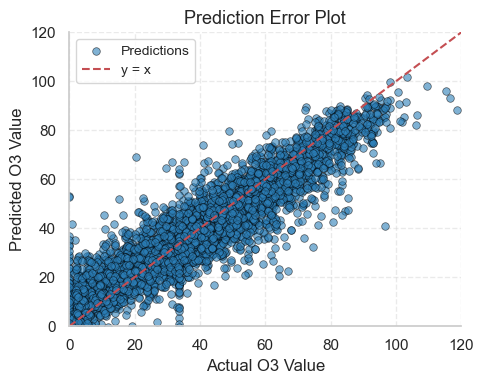

C:\Users\emin8\AppData\Local\Temp\ipykernel_30984\1596426027.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


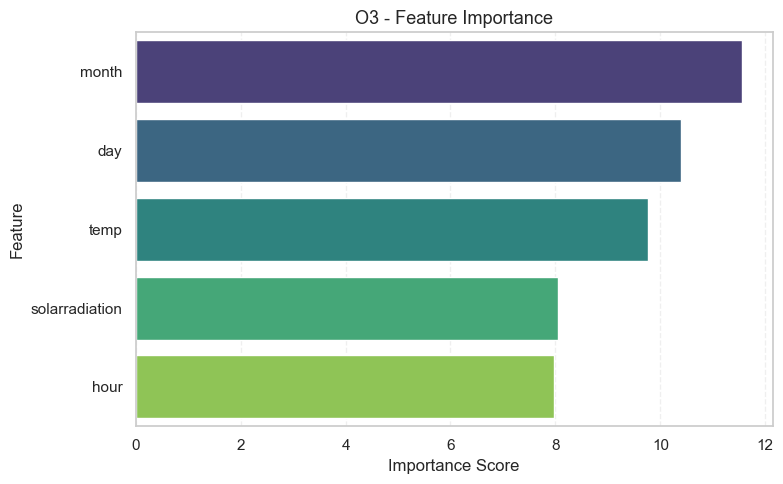

In [3]:
evaluate_catboost_o3(df)

In [5]:
def evaluate_catboost_o3(df, target='O3'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split, KFold
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',

        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour'
    ]

    X = df[selected_features]
    y = df[target]

    # Train-Test split (hold-out)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Cross-validation ayarları
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    mae_train_list, mae_test_list = [], []
    rmse_train_list, rmse_test_list = [], []
    r2_train_list, r2_test_list = [], []
    mape_list, medae_list, evs_list, maxerr_list = [], [], [], []

    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model = CatBoostRegressor(
            iterations=800,
            learning_rate=0.1,
            depth=10,
            l2_leaf_reg=15,
            verbose=0,
            random_state=42
        )
        model.fit(X_tr, y_tr)

        y_tr_pred = model.predict(X_tr)
        y_val_pred = model.predict(X_val)

        mae_train_list.append(mean_absolute_error(y_tr, y_tr_pred))
        mae_test_list.append(mean_absolute_error(y_val, y_val_pred))
        rmse_train_list.append(np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
        rmse_test_list.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
        r2_train_list.append(r2_score(y_tr, y_tr_pred))
        r2_test_list.append(r2_score(y_val, y_val_pred))
        mape_list.append(mean_absolute_percentage_error(y_val, y_val_pred))
        medae_list.append(median_absolute_error(y_val, y_val_pred))
        evs_list.append(explained_variance_score(y_val, y_val_pred))
        maxerr_list.append(max_error(y_val, y_val_pred))

    # CV Sonuçları
    print("CatBoost (Optimize + CV) - O3 Tahmini (5-Fold):")
    print(f"Mae Train (mean): {np.mean(mae_train_list):.2f}")
    print(f"Mae Test (mean): {np.mean(mae_test_list):.2f}")
    print(f"Rmse Train (mean): {np.mean(rmse_train_list):.2f}")
    print(f"Rmse Test (mean): {np.mean(rmse_test_list):.2f}")
    print(f"R2 Train (mean): {np.mean(r2_train_list):.4f}")
    print(f"R2 Test (mean): {np.mean(r2_test_list):.4f}")
    print(f"Mape (mean): {np.mean(mape_list):.2%}")
    print(f"Medae (mean): {np.mean(medae_list):.2f}")
    print(f"Evs (mean): {np.mean(evs_list):.4f}")
    print(f"Max Error (mean): {np.mean(maxerr_list):.2f}")

    # Hold-out testi (genel test seti)
    final_model = CatBoostRegressor(
        iterations=800,
        learning_rate=0.1,
        depth=10,
        l2_leaf_reg=15,
        verbose=0,
        random_state=42
    )
    final_model.fit(X_train, y_train)
    y_pred_test = final_model.predict(X_test)
    print(f"\nFinal Test MAE (Hold-out set): {mean_absolute_error(y_test, y_pred_test):.2f}")


In [6]:
evaluate_catboost_o3(df)

CatBoost (Optimize + CV) - O3 Tahmini (5-Fold):
Mae Train (mean): 3.79
Mae Test (mean): 7.12
Rmse Train (mean): 5.09
Rmse Test (mean): 9.57
R2 Train (mean): 0.9546
R2 Test (mean): 0.8397
Mape (mean): 142664012789702048.00%
Medae (mean): 5.40
Evs (mean): 0.8398
Max Error (mean): 57.72

Final Test MAE (Hold-out set): 6.91
